In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.integrate import solve_ivp
from collections import defaultdict
from functools import partial 
import scipy.integrate
from mpl_toolkits.mplot3d import axes3d
import matplotlib.patches as mpatches
%matplotlib inline

In [ ]:
### Task 3

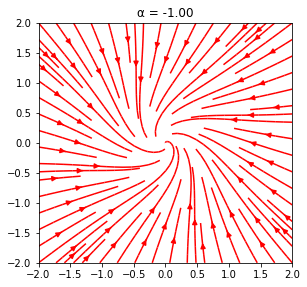

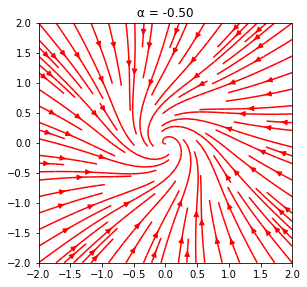

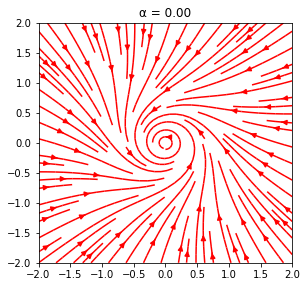

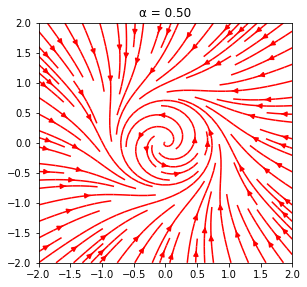

In [3]:
#

w = 2
x2, x1 = np.mgrid[-w:w:100j, -w:w:100j]

for alpha in np.arange(-1, 1, 0.5):  
    x_1_dot = alpha * x1 - x2 - x1*(np.square(x1) + np.square(x2))
    x_2_dot = x1 + alpha * x2 - x2*(np.square(x1) + np.square(x2))

    fig = plt.figure(figsize=(10, 20))
    gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

    ax0 = fig.add_subplot(gs[0, 0])
    ax0.streamplot(x1, x2, x_1_dot, x_2_dot, color='red')
    ax0.set_title(f"\u03B1 = {alpha:.2f}")

In [ ]:
# Part 2: alpha = 1

/var/folders/3r/28qlnv9x47ngvbqsgm18sk900000gq/T/ipykernel_39534/3395102118.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  ax0.plot([2], [0], 'ok', ms=10, color='r', alpha=0.5)
/var/folders/3r/28qlnv9x47ngvbqsgm18sk900000gq/T/ipykernel_39534/3395102118.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  ax1.plot([0.5], [0], 'ok', ms=10, color='r', alpha=0.5)


Text(0.5, 1.0, 'Two Orbits for α = 1')

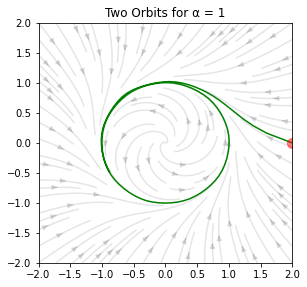

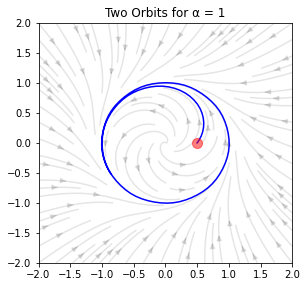

In [5]:
alpha = 1

def f(t, r):
    x1, x2 = r
    f1 = alpha * x1 - x2 - x1*(np.square(x1) + np.square(x2))
    f2 = x1 + alpha * x2 - x2*(np.square(x1) + np.square(x2))
    return f1, f2

# numerically solve 
sol = solve_ivp(f, (0, 10), (2, 0), t_eval=np.linspace(0, 10, 100))
xf, yf = sol.y

sol = solve_ivp(f, (0, 10), (0.5, 0), t_eval=np.linspace(0, 10, 100))
xs, ys = sol.y

x_1_dot = alpha * x1 - x2 - x1*(np.square(x1) + np.square(x2))
x_2_dot = x1 + alpha * x2 - x2*(np.square(x1) + np.square(x2))

fig = plt.figure(figsize=(10, 20))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(x1, x2, x_1_dot, x_2_dot, color=(0,0,0,.1))
ax0.plot(xf, yf, color='green')
ax0.plot([2], [0], 'ok', ms=10, color='r', alpha=0.5)
ax0.set_title(f"Two Orbits for \u03B1 = {alpha}")

fig = plt.figure(figsize=(10, 20))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

ax1 = fig.add_subplot(gs[0, 0])
ax1.streamplot(x1, x2, U, V, color=(0,0,0,.1))
ax1.plot(xs, ys, color='blue')
ax1.plot([0.5], [0], 'ok', ms=10, color='r', alpha=0.5)
ax1.set_title(f"Two Orbits for \u03B1 = {alpha}")